tensor([[-0.6438, -0.4956, -1.7554, -1.6907],
        [ 0.2146, -0.8561, -0.7152, -1.2076],
        [ 1.0730, -0.8561, -0.7152, -0.2415],
        [ 1.9314, -0.8561,  0.3251,  0.2415],
        [-0.6438,  1.3067,  0.3251,  0.2415],
        [-0.6438, -0.4956,  0.3251,  0.7246],
        [-0.6438,  0.9462,  0.8452,  0.7246],
        [-0.6438,  1.3067,  1.3653,  1.2076]])
Epoch : 0, Cost : 0.9317
Epoch : 100, Cost : 0.3626
Epoch : 200, Cost : 0.2577
Epoch : 300, Cost : 0.1953
Epoch : 400, Cost : 0.1545
Epoch : 500, Cost : 0.1259
Epoch : 600, Cost : 0.1047
Epoch : 700, Cost : 0.0883
Epoch : 800, Cost : 0.0754
Epoch : 900, Cost : 0.0650
Epoch : 1000, Cost : 0.0565
Epoch : 1100, Cost : 0.0495
Epoch : 1200, Cost : 0.0437
Epoch : 1300, Cost : 0.0387
Epoch : 1400, Cost : 0.0345
Epoch : 1500, Cost : 0.0309
Epoch : 1600, Cost : 0.0278
Epoch : 1700, Cost : 0.0252
Epoch : 1800, Cost : 0.0228
Epoch : 1900, Cost : 0.0208
Epoch : 2000, Cost : 0.0189
Epoch : 2100, Cost : 0.0173
Epoch : 2200, Cost : 0.0159

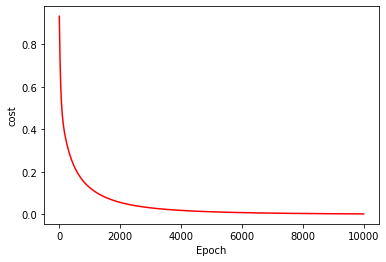

In [47]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

class SoftmaxClassification(nn.Module):
    def __init__(self,input_row,input_col):
        super().__init__()
        self.Linear = nn.Linear(input_row,input_col)
    def forward(self,input_x):
        return self.Linear(input_x)
    
x_train = torch.Tensor([
    [1,2,1,1],
    [2,1,3,2],
    [3,1,3,4],
    [4,1,5,5],
    [1,7,5,5],
    [1,2,5,6],
    [1,6,6,6],
    [1,7,7,7],    
])
y_train = torch.LongTensor([
    2,2,2,1,1,1,0,0
])
x_exp = x_train.mean(dim = 0 )  # col방향으로 평균을 구하자
x_sigma = x_train.std(dim = 0 ) # col 방향으로 표준편차를 구하자
Norm_x_train = (x_train-x_exp) / x_sigma
print(Norm_x_train)
cost_list = []
Model = SoftmaxClassification(4,3)
optimizer = optim.Adam(Model.parameters(),lr = 0.01)

for Epoch in range(5001):
    
    hypothesis = Model.forward(Norm_x_train )
    cost = F.cross_entropy(hypothesis,y_train)
    
    optimizer.zero_grad()
    cost.backward()
  
    optimizer.step()
    cost_list.append(cost.item())
    if Epoch% 100 ==0 :
        print("Epoch : {}, Cost : {:.4f}".format(Epoch,cost.item()))
x= np.linspace(0,10000,5001)
plt.plot(x,cost_list,'r')
plt.xlabel("Epoch")
plt.ylabel("cost")
plt.show()
